# Lab 4. Probabilistic Inference
# Task 4.1 Iris Classification Using Naïve Bayes 
## Problem Descriptions
Implement a classifier using the iris dataset of sklearn lib.
input to the system should be flower features and output should be targeted plant.
The dataset contains
*  sepal length, sepal width, 
* petal length ,petal width

Along with the above details, it also contains corresponding flower name, encoded in numeric format(0 - 3).

## Implementation and Results

* Steps to implement the solution:--

Below Algo diagram represent the solution approach:--








<br>

<img src = 'https://drive.google.com/uc?id=1LKjojxzcDwxBVCve0pk0W8y0nBQMAQ1O'/>

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=540ace5032282f16253cba1627ed0c8dc4b7c4e00b63b699acd78cd0fbc93a0b
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import seaborn as sns


In [ ]:
iris = datasets.load_iris()

#loading data as dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
iris = datasets.load_iris()

#loading data as dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

##correlation between the features

    we avoid using highy correlated columns

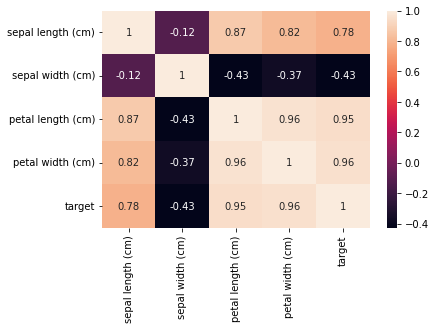

In [ ]:
plot =  sns.heatmap(iris_df.corr(),annot=True)

In [ ]:
# We only use two features (sepal and petaal length)





# X = iris.data
X = iris.data[:, [0,2]]
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)


Accuracy: 0.8666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  8  2]
 [ 0  2  6]]
Prior:
 [0.31666667 0.33333333 0.35      ]
Mean:
 [[5.03421053 1.47368421]
 [5.93       4.1825    ]
 [6.59047619 5.5547619 ]]
Variance:
 [[0.10804017 0.02614959]
 [0.2761     0.21894375]
 [0.3999093  0.31104876]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X

In [ ]:
#plot = sns.heatmap()
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


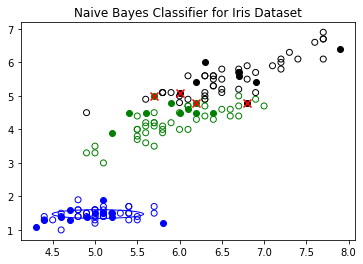

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  
error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')  
#ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
ax = plt.gca()
ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Prior:
 [0.33333333 0.33333333 0.33333333]
Mean:
 [[5.0575 3.49   1.4725 0.2525]
 [5.9325 2.7925 4.25   1.335 ]
 [6.64   2.98   5.645  2.04  ]]
Variance:
 [[0.12294375 0.1074     0.03299375 0.01199375]
 [0.25219375 0.08969375 0.216      0.035775  ]
 [0.4114     0.1206     0.299975   0.0754    ]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


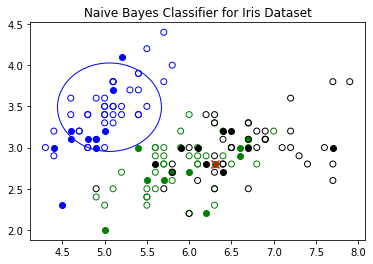

In [ ]:

#we use all features
X = iris.data
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  
error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')  
#ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
ax = plt.gca()
ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

## Discussions

* we tried with both 2 feature and 4 feature.

* internal Working of Naïve Bayes

for this task we have Naïve Bayes model, which works on the principle of probability. The mathematical formula for estimating the probability is:--
https://drive.google.com/uc?id=<ID of image>

<img src = "https://drive.google.com/uc?id=1YGDwlRjKBL_JJD13sdYV64e-EbhNJHqn">
        

    if we have to formulate formula for our problem, it would come like this.
    *  𝑃(𝑐𝑖|𝑓1, 𝑓2) = 𝛼𝑃(𝑓1|𝑐𝑖) 𝑃(𝑓2|𝑐𝑖) (𝑐𝑖)

    here, f1 and f2 are the features and "ci" is the flower class we are trying to predict.

Once we load the data, we visualize the correlation.

        * usually we don't use the feature where correlation 
        is greater than 80%.

-----
 * Accuracy

 while testing the model on test dataset, we could confirm that accuracy is 90%. 

        also, for 3 - class classfication we don't directly get true positive and false positive , 
        we need to calculate from the confusion matrix.

        *    setosa    [ [15        0              0]
            versicolour[ 0          6              2]
            Virginica  [ 0          1              6]]
                       setosa.  versicolour.  Virginica

        eg: for setosa TP is 15. 
        FN is (0 + 0), which is 0.
        TN is (6 + 2 + 1 + 6), which is 15.


  * also, while plotting the errors it is quite clearly visible that, two of the species are not  clealy seperable, and error is occuring in that region. 
            